In [26]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy.linalg

In [16]:
#Load RNN data

f = h5py.File("rnn_data.hdf5", "r")
X_full = f["data"]
T_full, N = X_full.shape
dt_full = f.attrs["dt"]
print(T_full, N, dt_full)

#Load a few hours of data (24 hours available)
num_hours = 5
T = int(np.round( num_hours*60**2 / dt_full ))
dt = 0.050
skip = int(np.round( dt / dt_full ))
X = X_full[0:T:skip]

print(X.shape)

21600000 250 0.004
(375000, 250)


In [17]:
#standardize

X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

0
10
20
30
40


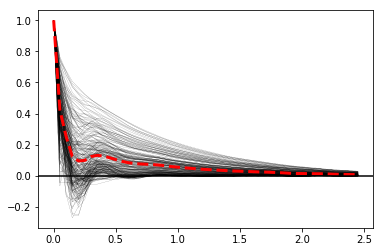

In [18]:
#Visualize single-neuron autocorr. functions
max_dt = int(2.5 / dt)
corr_fns = np.zeros((N, max_dt))
for i in range(max_dt):
    if i % 10 == 0:
        print(i)
    corr_fns[:, i] = (X[i:] * X[:len(X)-i]).sum(axis=0)/(len(X)-i)
    
t = np.arange(max_dt)*dt
plt.plot(t, corr_fns.T, linewidth=0.1, c="black")
plt.plot(t, corr_fns.mean(axis=0), linewidth=3, c="red", linestyle="--")
plt.axhline(0, c="black")

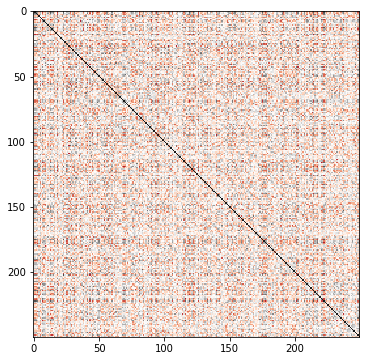

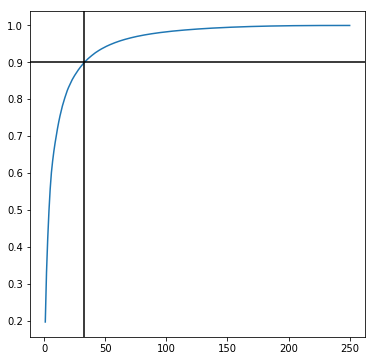

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
corr = np.dot(X.T, X)/len(X)
ax.imshow(corr, vmin=-1, vmax=1, cmap="RdGy")
plt.show()

w, _ = scipy.linalg.eigh(corr)
w = w[::-1]
d_pct = 0.9
pve = np.cumsum(w) / np.sum(w)
d = np.argmax(pve > d_pct) + 1
x_vals = np.arange(len(pve)) + 1
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x_vals, pve)
ax.axhline(d_pct, c="black")
ax.axvline(d, c="black")
plt.show()